In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flowers-recognition/flowers/dandelion/34578947551_863af3acb3_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/2625836599_03e192266f.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/16242239484_51286673af.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/5716633491_55e6f02645_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/34697163155_5dc2571f23_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/34686041416_e50c8028f9_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/8719032054_9a3ce4f0ff.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9472854850_fc9e1db673.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/31530587330_ba31bd196e_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9293460423_7fbb1e3c32_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9939430464_5f5861ebab.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/2535769822_513be6bbe9.jpg
/kaggle/input/flowers-recognition/flowers/dande

# **FLOWER RECOGNITION**

**ALL THE COMMENTED CODE IS MY OLD VERSION CODE, WHERE I WAS DONG IN DIFFERE WAY**

# Importing necessary libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from IPython.display import Image, display
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tqdm import tqdm
import cv2
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**displaying flower images from each class**

daisy


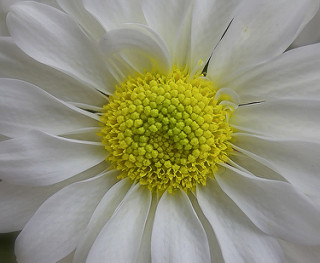



dandelion


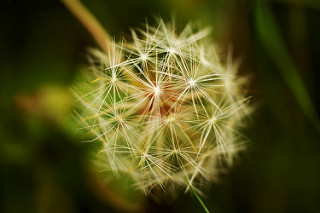



rose


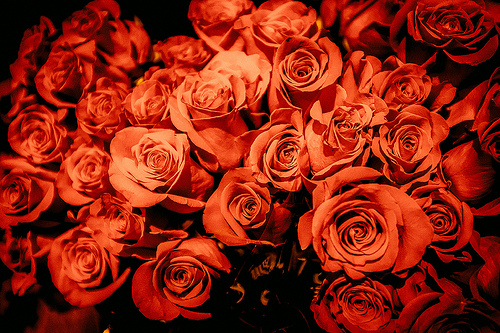



sunflower


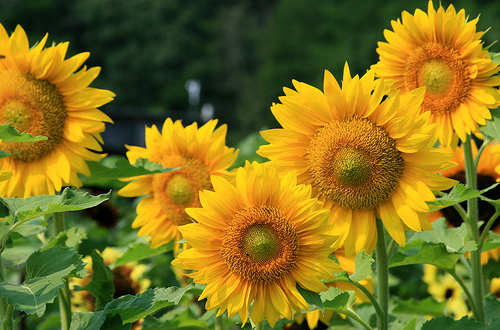



tulip


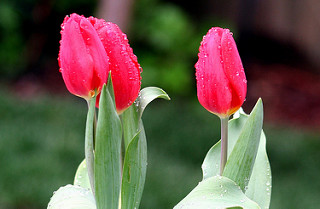

In [3]:
listOfImageNames = ['/kaggle/input/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg',
                    '/kaggle/input/flowers-recognition/flowers/dandelion/10043234166_e6dd915111_n.jpg',
                    '/kaggle/input/flowers-recognition/flowers/rose/10503217854_e66a804309.jpg',
                    '/kaggle/input/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg',
                    '/kaggle/input/flowers-recognition/flowers/tulip/100930342_92e8746431_n.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']
for i,imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))
    print("\n")

# **Splitting the folder into train validate and test folders**

In [4]:
! pip install split-folders

In [5]:
import splitfolders

In [6]:
input_folder = "/kaggle/input/flowers-recognition/flowers"
output = "Output_Folder" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:23, 180.07 files/s]


## **Data Augmentation**

In [7]:
# datagen = ImageDataGenerator(
#     rescale = 1./255,
#     shear_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     zoom_range=0.2,
#     rotation_range = 40,
#     width_shift_range= 0.2,
#     height_shift_range= 0.2,
#     validation_split=0.25
# )

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2
)

validate_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

## **creating a training and testing data**

In [9]:
train_data =  train_datagen.flow_from_directory(
        "/kaggle/working/Output_Folder/train",
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

validate_data = validate_datagen.flow_from_directory(
        "/kaggle/working/Output_Folder/val",
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

test_data =  test_datagen.flow_from_directory(
        "/kaggle/working/Output_Folder/test",
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

Found 3019 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Found 438 images belonging to 5 classes.


**spliting above data into, data and labels**

1. total images in train_data = 3238, batch size = 32, therefore total no. of batches formed are 3238/32 = 101.

2. total images in test_data = 1079, batch size = 32, therefore total no. of batches formed are 1079/32 = 33.

In [10]:
# train_labels = []
# traindata = []
# for i in range(0,102):
#     train_labels.extend(np.array(train_data[i][1]))
#     traindata.extend(np.array(train_data[i][0]))
    
# test_labels=[]
# testdata = []
# for i in range(0,34):
#     test_labels.extend(np.array(test_data[i][1]))
#     testdata.extend(np.array(test_data[i][0]))

## **Visualizing random images from our training data**

In [11]:
# train_data.class_indices

**transforming onhotencoded labels into actual labels name**

In [12]:
# lbls = []
# for i in train_labels:
#     if all(i == [0.,0.,0.,0.,1.]):
#         lbls.append('tulip')
#     elif all(i == [0.,0.,0.,1.,0.]):
#         lbls.append('sunflower')
#     elif all(i == [0.,0.,1.,0.,0.]):
#         lbls.append('rose')
#     elif all(i == [0.,1.,0.,0.,0.]):
#         lbls.append('dendelion')
#     elif all(i == [1.,0.,0.,0.,0.]):
#         lbls.append('daisy')

In [13]:
# fig,ax=plt.subplots(5,3)
# fig.set_size_inches(15,15)
# for i in range(5):
#     for j in range (3):
#         #l=rn.randint(0,len(train_labels))
#         ax[i,j].imshow(train_data[l])
#         #ax[i,j].set_title('Flower: '+lbls[l])
        
# plt.tight_layout()

**converting list into array**

In [14]:
# traindata = np.array(traindata)
# testdata = np.array(testdata)
# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)

# **Buliding Model**

In [15]:
model = Sequential()

we are using four convolutional layers and four maxpooling layers

In [16]:
model.add(Conv2D(filters=32,activation='relu',kernel_size=5,input_shape=[150,150,3]))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=64,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=96,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=96,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Flatten())


model.add(Dense(64,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 96)       0

**creating early stopping**

In [17]:
es = EarlyStopping(monitor='val_loss',patience=3,mode='min')

## **Compiling the model**

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**training the model**

In [19]:
model.fit(train_data,verbose=1,validation_data=validate_data,batch_size=128,epochs=50,callbacks=[es])

Epoch 1/50
95/95 [==============================] - 33s 267ms/step - loss: 1.3854 - accuracy: 0.3859 - val_loss: 1.1320 - val_accuracy: 0.5070
Epoch 2/50
95/95 [==============================] - 25s 260ms/step - loss: 1.1874 - accuracy: 0.5008 - val_loss: 1.1814 - val_accuracy: 0.5047
Epoch 3/50
95/95 [==============================] - 25s 265ms/step - loss: 1.0573 - accuracy: 0.5720 - val_loss: 0.9663 - val_accuracy: 0.6105
Epoch 4/50
95/95 [==============================] - 25s 265ms/step - loss: 1.0282 - accuracy: 0.5995 - val_loss: 1.0008 - val_accuracy: 0.6081
Epoch 5/50
95/95 [==============================] - 25s 262ms/step - loss: 0.9743 - accuracy: 0.6184 - val_loss: 0.9735 - val_accuracy: 0.6209
Epoch 6/50
95/95 [==============================] - 25s 262ms/step - loss: 0.9392 - accuracy: 0.6416 - val_loss: 0.9794 - val_accuracy: 0.6384


## **Creating dataframe of losses and accuracies of model**

In [20]:
losses = model.history.history

In [21]:
df_loss = pd.DataFrame(losses)

In [22]:
df_loss.sort_values(by='val_accuracy',ascending=False)

,loss,accuracy,val_loss,val_accuracy
5,0.939165,0.641603,0.979422,0.638372
4,0.974336,0.618417,0.973504,0.620930
2,1.057252,0.572044,0.966267,0.610465
3,1.028236,0.599536,1.000774,0.608140
0,1.385408,0.385889,1.131962,0.506977
1,1.187421,0.500828,1.181425,0.504651


## **Visualizing the performance of model**

Text(0.5, 1.0, 'LOSS VS EPOCHS')

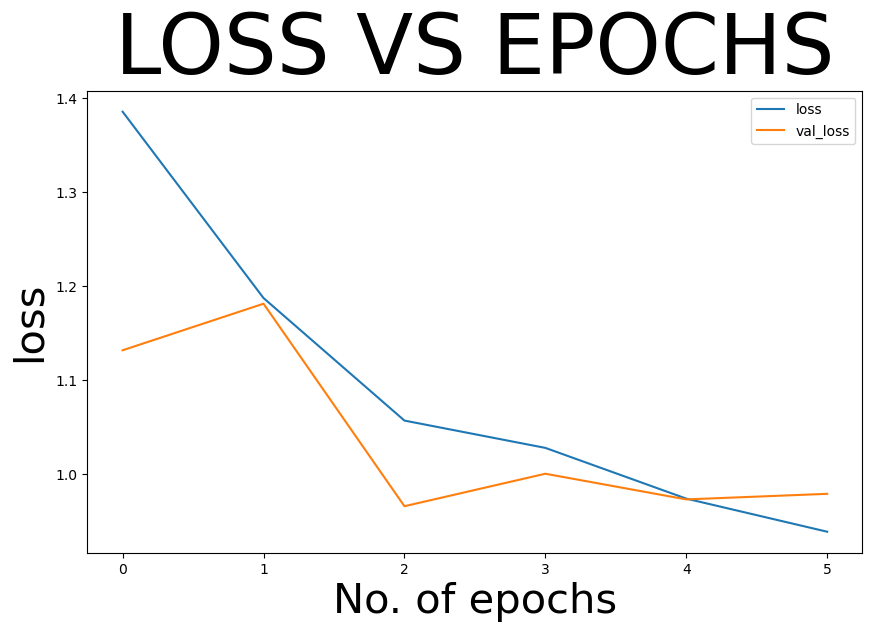

In [23]:
df_loss[['loss','val_loss']].plot(figsize=(10,6))
plt.xlabel("No. of epochs",size=30)
plt.ylabel("loss",size=30)
plt.title("LOSS VS EPOCHS",size=60)

Text(0.5, 1.0, 'Accuracy VS EPOCHS')

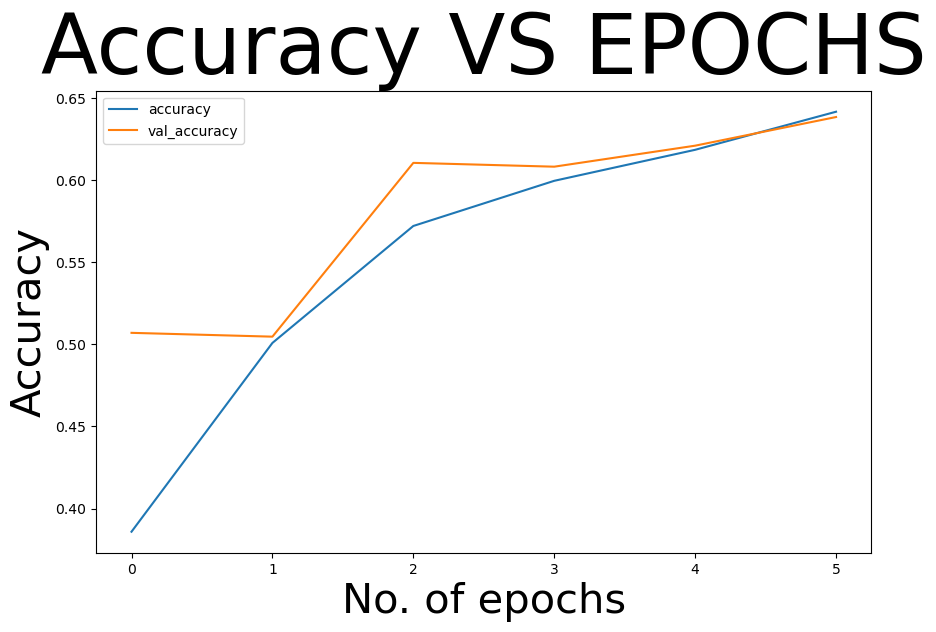

In [24]:
df_loss[['accuracy','val_accuracy']].plot(figsize=(10,6))
plt.xlabel("No. of epochs",size=30)
plt.ylabel("Accuracy",size=30)
plt.title("Accuracy VS EPOCHS",size=60)

## **Evaluting the model on test data**

In [25]:
loss, accuracy= model.evaluate(test_data)
print(f'Accuracy: {accuracy*100}')

14/14 [==============================] - 1s 95ms/step - loss: 0.9381 - accuracy: 0.6461
Accuracy: 64.6118700504303


# -----------------------------------------------------------------------

In [26]:
# lbls = []
# for i in test_labels:
#     if all(i == [0.,0.,0.,0.,1.]):
#         lbls.append(4)
#     elif all(i == [0.,0.,0.,1.,0.]):
#         lbls.append(3)
#     elif all(i == [0.,0.,1.,0.,0.]):
#         lbls.append(2)
#     elif all(i == [0.,1.,0.,0.,0.]):
#         lbls.append(1)
#     elif all(i == [1.,0.,0.,0.,0.]):
#         lbls.append(0)

In [27]:
# lbls = np.array(lbls)

In [28]:
# len(lbls)

In [29]:
# print(confusion_matrix(lbls,pred_digits))
# print(classification_report(lbls,pred_digits))

# --------------------------------------------------------

# **USING KERAS TUNER FOR CNN MODEL**

**used for hyperparamenter tuning**

**creating build_model function, hp is hyperparameter**

In [30]:
import tensorflow as tf
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(150, 150, 3)
        ),
        keras.layers.MaxPool2D(
            pool_size=hp.Choice('maxpool_1_kernel', values=[2,3, 5]),
            padding='same'
        ),
        keras.layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'
        ),
        keras.layers.MaxPool2D(
            pool_size=hp.Choice('maxpool_2_kernel', values=[2,3, 5]),
            padding='same'
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
            activation='relu'
        ),
        keras.layers.Dropout(rate=hp.Choice('dropout_1_rate', values=[0.5, 0.6, 0.8])),
        keras.layers.Dense(
            units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),
            activation='relu'
        ),
        keras.layers.Dropout(rate=hp.Choice('dropout_2_rate', values=[0.5, 0.6, 0.8])),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [31]:
tunersearch = RandomSearch(build_model,objective='val_accuracy',max_trials=5)

In [32]:
tunersearch.search(train_data,epochs=5,validation_data=validate_data,callbacks=[es])

Trial 5 Complete [00h 02m 09s]
val_accuracy: 0.24418604373931885

Best val_accuracy So Far: 0.5011627674102783
Total elapsed time: 00h 11m 41s


In [33]:
best_hps=tunersearch.get_best_hyperparameters(num_trials=1)[0]

In [34]:
model = tunersearch.hypermodel.build(best_hps)
history = model.fit(train_data,validation_data=validate_data, epochs=50)

Epoch 1/50
95/95 [==============================] - 27s 270ms/step - loss: 1.5652 - accuracy: 0.2673 - val_loss: 1.4180 - val_accuracy: 0.4535
Epoch 2/50
95/95 [==============================] - 25s 268ms/step - loss: 1.4813 - accuracy: 0.3359 - val_loss: 1.3398 - val_accuracy: 0.4709
Epoch 3/50
95/95 [==============================] - 25s 262ms/step - loss: 1.4439 - accuracy: 0.3819 - val_loss: 1.3022 - val_accuracy: 0.4593
Epoch 4/50
95/95 [==============================] - 25s 262ms/step - loss: 1.4051 - accuracy: 0.4015 - val_loss: 1.2693 - val_accuracy: 0.5070
Epoch 5/50
95/95 [==============================] - 25s 267ms/step - loss: 1.3723 - accuracy: 0.4309 - val_loss: 1.2087 - val_accuracy: 0.4942
Epoch 6/50
95/95 [==============================] - 25s 265ms/step - loss: 1.3296 - accuracy: 0.4299 - val_loss: 1.1758 - val_accuracy: 0.5116
Epoch 7/50
95/95 [==============================] - 25s 266ms/step - loss: 1.3161 - accuracy: 0.4455 - val_loss: 1.1631 - val_accuracy: 0.5256

In [35]:
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch))

Best epoch: 40


In [36]:
hypermodel = tunersearch.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_data,epochs=best_epoch, validation_data=validate_data)

Epoch 1/40
95/95 [==============================] - 29s 286ms/step - loss: 1.5887 - accuracy: 0.2594 - val_loss: 1.4730 - val_accuracy: 0.3674
Epoch 2/40
95/95 [==============================] - 24s 254ms/step - loss: 1.5027 - accuracy: 0.3306 - val_loss: 1.3748 - val_accuracy: 0.4512
Epoch 3/40
95/95 [==============================] - 25s 265ms/step - loss: 1.4652 - accuracy: 0.3561 - val_loss: 1.2936 - val_accuracy: 0.4430
Epoch 4/40
95/95 [==============================] - 25s 259ms/step - loss: 1.4249 - accuracy: 0.3793 - val_loss: 1.2765 - val_accuracy: 0.4744
Epoch 5/40
95/95 [==============================] - 25s 263ms/step - loss: 1.3901 - accuracy: 0.3919 - val_loss: 1.2063 - val_accuracy: 0.5058
Epoch 6/40
95/95 [==============================] - 24s 252ms/step - loss: 1.3572 - accuracy: 0.4263 - val_loss: 1.1791 - val_accuracy: 0.5500
Epoch 7/40
95/95 [==============================] - 25s 266ms/step - loss: 1.3275 - accuracy: 0.4442 - val_loss: 1.1871 - val_accuracy: 0.5372

In [37]:
eval_result = hypermodel.evaluate(test_data)
print("[test loss, test accuracy]:", eval_result)

14/14 [==============================] - 1s 102ms/step - loss: 0.6982 - accuracy: 0.7306
[test loss, test accuracy]: [0.6982290148735046, 0.7305936217308044]


# --------------------------------------------------------

# **Transfer learning**

## **Using VGG16 model for image recognition**

In [38]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [39]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=(150, 150, 3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [40]:
# our layers - you can add more if you want
X = MaxPool2D()(vgg.output)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)

X = Dense(5, activation='softmax')(X)

In [41]:
# create a model object
model = Model(inputs=vgg.input, outputs=X)

In [42]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [43]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [44]:
# fit the model
model.fit(
  train_data,
  validation_data=validate_data,
  epochs=15,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data)
)

Epoch 1/15
95/95 [==============================] - 28s 270ms/step - loss: 1.1003 - accuracy: 0.5856 - val_loss: 0.7840 - val_accuracy: 0.7009
Epoch 2/15
95/95 [==============================] - 25s 265ms/step - loss: 0.7685 - accuracy: 0.7145 - val_loss: 0.7374 - val_accuracy: 0.7299
Epoch 3/15
95/95 [==============================] - 26s 267ms/step - loss: 0.7195 - accuracy: 0.7337 - val_loss: 0.7771 - val_accuracy: 0.7031
Epoch 4/15
95/95 [==============================] - 26s 270ms/step - loss: 0.6990 - accuracy: 0.7393 - val_loss: 0.6594 - val_accuracy: 0.7723
Epoch 5/15
95/95 [==============================] - 26s 269ms/step - loss: 0.6544 - accuracy: 0.7618 - val_loss: 0.5801 - val_accuracy: 0.7902
Epoch 6/15
95/95 [==============================] - 24s 254ms/step - loss: 0.6244 - accuracy: 0.7668 - val_loss: 0.5726 - val_accuracy: 0.7902
Epoch 7/15
95/95 [==============================] - 24s 253ms/step - loss: 0.6318 - accuracy: 0.7685 - val_loss: 0.6352 - val_accuracy: 0.7455

In [45]:
losses = model.history.history

In [46]:
df_loss = pd.DataFrame(losses)

Text(0.5, 1.0, 'LOSS VS EPOCHS')

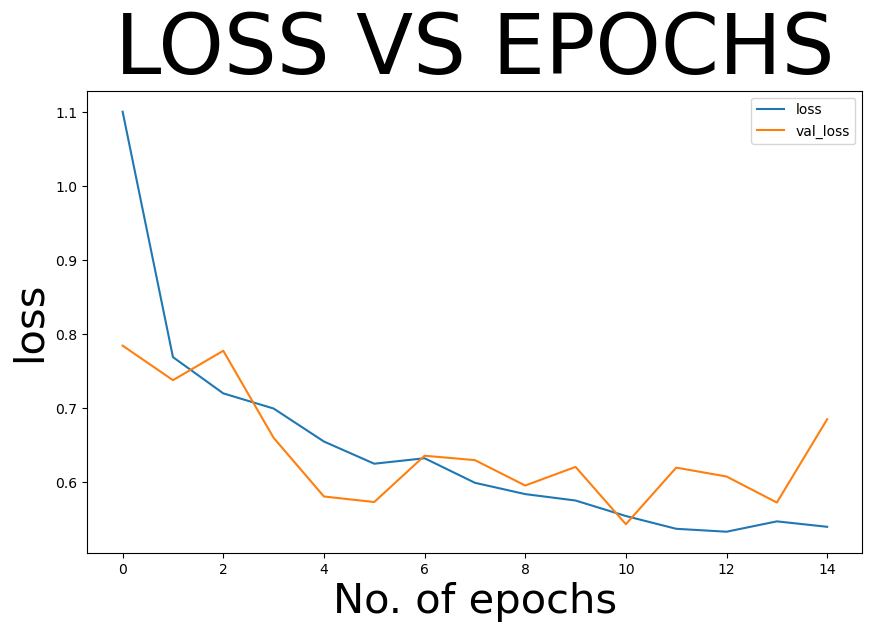

In [47]:
df_loss[['loss','val_loss']].plot(figsize=(10,6))
plt.xlabel("No. of epochs",size=30)
plt.ylabel("loss",size=30)
plt.title("LOSS VS EPOCHS",size=60)

Text(0.5, 1.0, 'Accuracy VS EPOCHS')

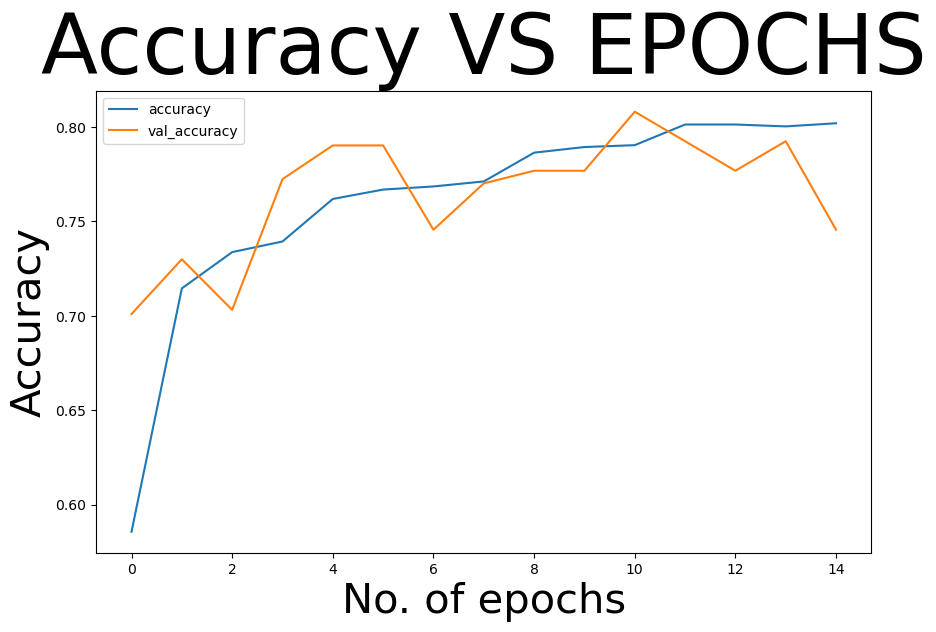

In [48]:
df_loss[['accuracy','val_accuracy']].plot(figsize=(10,6))
plt.xlabel("No. of epochs",size=30)
plt.ylabel("Accuracy",size=30)
plt.title("Accuracy VS EPOCHS",size=60)

In [49]:
from tensorflow.keras.applications import ResNet50

In [50]:
# add preprocessing layer to the front of VGG
rsnet = ResNet50(input_shape=(150, 150, 3), weights='imagenet', include_top=False)
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# our layers - you can add more if you want
X = MaxPool2D()(rsnet.output)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)

X = Dense(5, activation='softmax')(X)

# create a model object
model = Model(inputs=rsnet.input, outputs=X)

94765736/94765736 [==============================] - 1s 0us/step


In [51]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [52]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [53]:
# fit the model
model.fit(
  train_data,
  validation_data=validate_data,
  epochs=15,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data)
)

Epoch 1/15
95/95 [==============================] - 62s 314ms/step - loss: 1.8790 - accuracy: 0.6095 - val_loss: 2.6675 - val_accuracy: 0.2442
Epoch 2/15
95/95 [==============================] - 29s 301ms/step - loss: 0.7414 - accuracy: 0.7327 - val_loss: 1.7662 - val_accuracy: 0.2442
Epoch 3/15
95/95 [==============================] - 28s 298ms/step - loss: 0.6554 - accuracy: 0.7688 - val_loss: 1.8148 - val_accuracy: 0.1814
Epoch 4/15
95/95 [==============================] - 28s 294ms/step - loss: 0.6003 - accuracy: 0.7854 - val_loss: 1.9248 - val_accuracy: 0.1837
Epoch 5/15
95/95 [==============================] - 28s 295ms/step - loss: 0.6059 - accuracy: 0.7867 - val_loss: 1.9337 - val_accuracy: 0.2279
Epoch 6/15
95/95 [==============================] - 28s 293ms/step - loss: 0.5815 - accuracy: 0.7880 - val_loss: 2.1660 - val_accuracy: 0.2419
Epoch 7/15
95/95 [==============================] - 28s 292ms/step - loss: 0.5723 - accuracy: 0.8029 - val_loss: 1.5280 - val_accuracy: 0.3407

In [54]:
losses = model.history.history

Text(0.5, 1.0, 'LOSS VS EPOCHS')

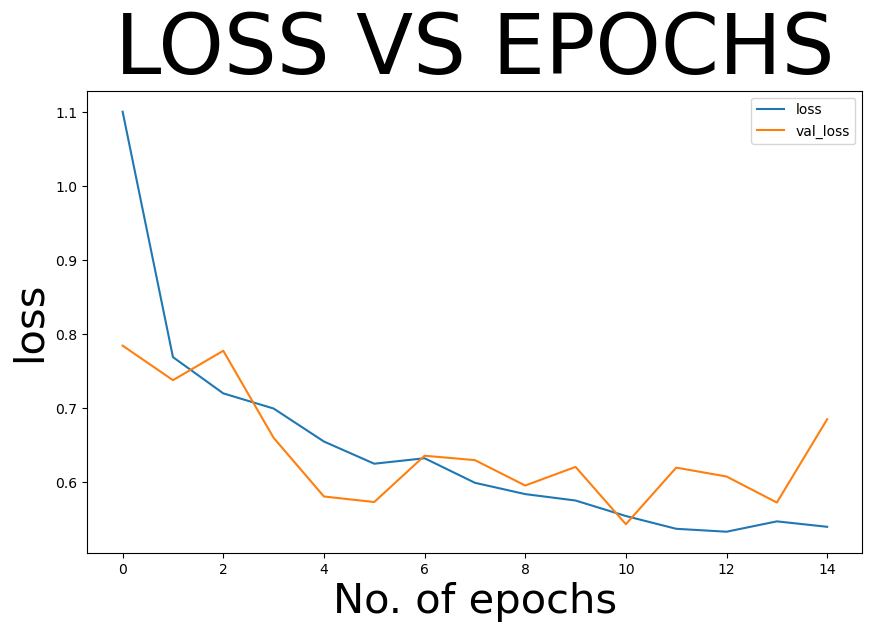

In [55]:
df_loss[['loss','val_loss']].plot(figsize=(10,6))
plt.xlabel("No. of epochs",size=30)
plt.ylabel("loss",size=30)
plt.title("LOSS VS EPOCHS",size=60)

Text(0.5, 1.0, 'Accuracy VS EPOCHS')

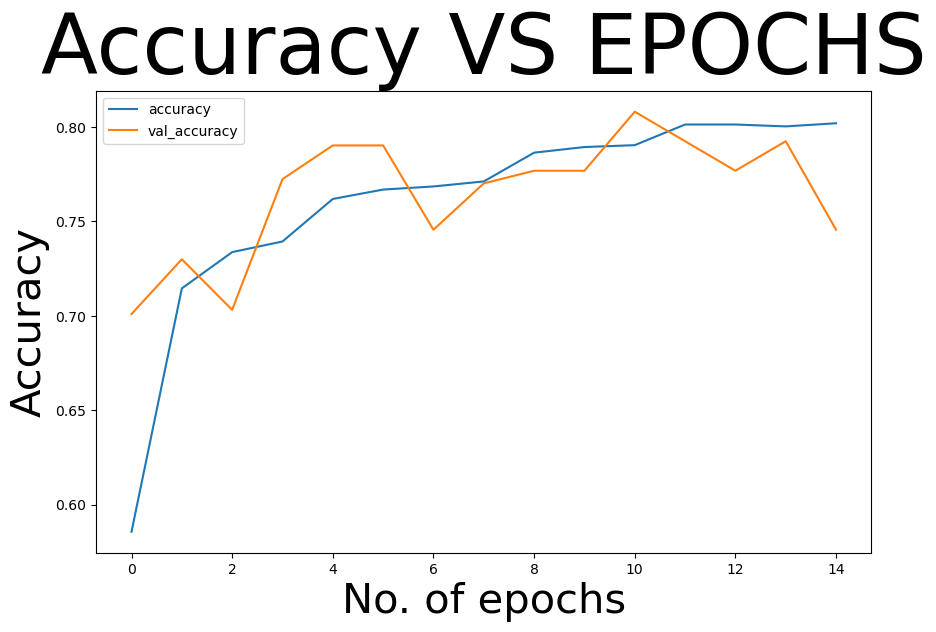

In [56]:
df_loss[['accuracy','val_accuracy']].plot(figsize=(10,6))
plt.xlabel("No. of epochs",size=30)
plt.ylabel("Accuracy",size=30)
plt.title("Accuracy VS EPOCHS",size=60)